# The Spark Foundation # Task 3

### Task :    
#### 1 : To perform 'Exploratory Data Analysis on the provided dataset 'SampleSuperStore'.
#### 2 : As a business manager, try to find out the week areas where you can work to make more profit.
#### 3 : what all business problems you can derive by exploring the data?


## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
data=pd.read_csv('SampleSuperstore-spark.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## EDA (Exploratory Data Analysis)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Observation:
1. There are 9994 rows and 13 columns
2. Categorical columns - 8 and numberic columns - 5
3. The target variable is "Profit"

#### checking the null data

In [4]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

#### Finding Total number of null values in a dataset

In [5]:
print("total number of null values = ",data.isnull().sum().sum())

total number of null values =  0


#### Statistical details of the dataset

In [6]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


#### Shape of the dataset

In [7]:
data.shape

(9994, 13)

#### Check the dataset for duplicate and dropping element

In [8]:
data.duplicated().sum()

17

In [9]:
data=data.drop_duplicates()

In [10]:
# Now the shape of the dataset is
data.shape

(9977, 13)

#### Number of distinct observation in each columns

In [11]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

In [12]:
# Deleting the country column

data=data.drop('Country', axis=1)

In [13]:
new_col=data[['Ship Mode','Segment','Region','Category']]

In [14]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


In [15]:
data.columns

Index(['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [16]:
categorical_col=data[['Ship Mode', 'Segment', 'City', 'State','Region', 'Category', 'Sub-Category']]

### Data Visualization

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

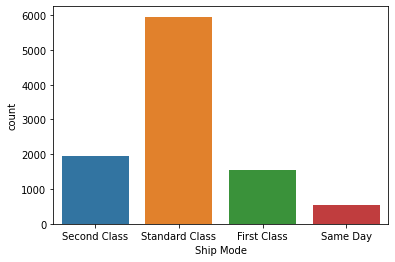

In [17]:
sns.countplot(x=data['Ship Mode'])

###### Standard class of ship mode having the highest value count as per the above chart

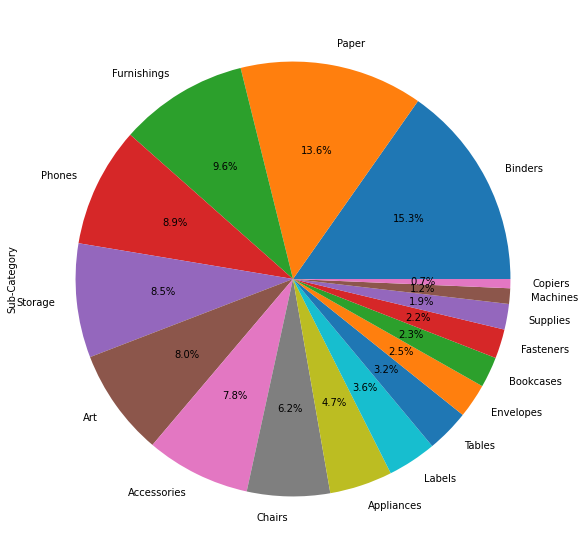

In [18]:
plt.figure(figsize=(12,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

##### Binders having the highest value count (15.2 %)

Text(0.5, 1.0, 'Year wise Total Sales & % of profit gained')

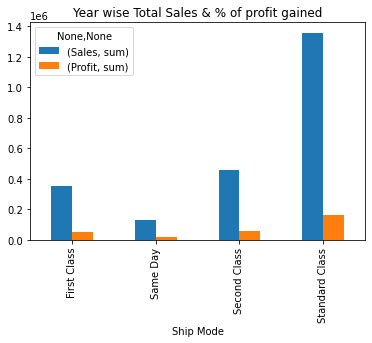

In [19]:
#Sales per Ship mode
data.groupby('Ship Mode')['Sales','Profit'].agg(['sum']).plot.bar()
plt.title('Year wise Total Sales & % of profit gained')

##### Standard class of ship mode having the highest value count and profit 

In [20]:
Top_shipping=data.groupby('Ship Mode').sum().sort_values('Sales', ascending=False)
Top_shipping

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
Standard Class,326946816,1.357316e+06,22756,954.12,163969.2280
Second Class,108033820,4.591770e+05,7418,269.35,57446.6516
First Class,84152470,3.513805e+05,5690,252.97,48953.6561
Same Day,31147971,1.283217e+05,1956,82.75,15871.8869


##### observation:
    1. We can see that Shipping mode - Standard Class generated the highest revenue of about $163969.
2. The Total Revenue generated by all the shipping modes - $286239
    3. In terms of Quantity sold and Discount also heigh in Standard class 
    4. Same day ship mode generating the least Profit
    5. The discount given and sales price also less in Sameday shipmode

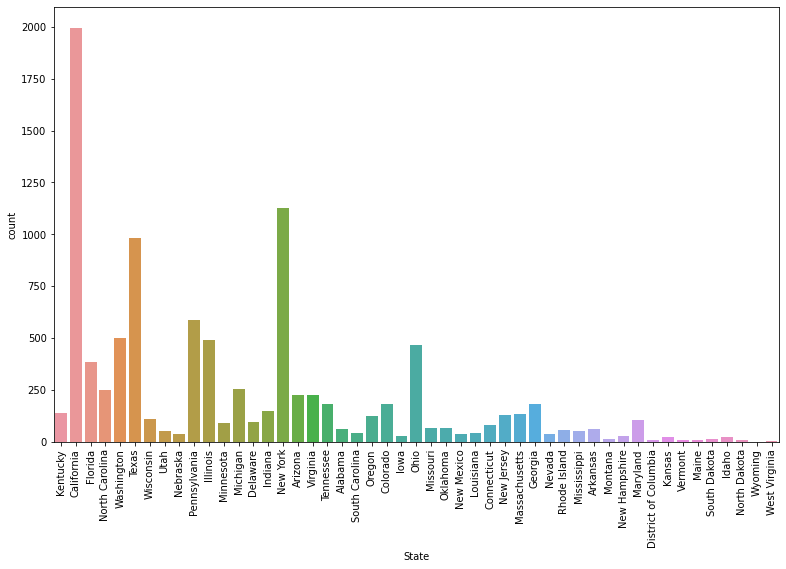

In [21]:
plt.figure(figsize=(13,8))
sns.countplot(x=data['State'])
plt.xticks(rotation=90)
plt.show()

##### State - California have more number of sales count

In [22]:
top_state=data.groupby('State').sum().sort_values('Profit', ascending=False)
top_state.head(10)

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
California,183916115,457576.2715,7649,145.6,76330.7891
New York,11825710,310827.1510,4220,62.4,74015.4622
Washington,49269259,138560.8100,1871,32.4,33368.2375
Michigan,12307876,75879.6440,943,1.8,24428.0903
Virginia,5124335,70636.7200,893,0.0,18597.9504
Indiana,6991602,53555.3600,578,0.0,18382.9363
Georgia,5685480,49095.8400,705,0.0,16250.0433
Kentucky,5725336,36591.7500,523,0.0,11199.6966
Minnesota,4932224,29863.1500,331,0.0,10823.1874


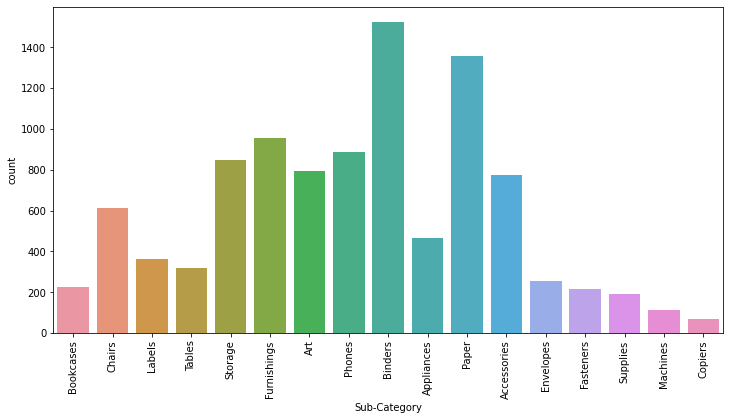

In [23]:
plt.figure(figsize=(12,6))
sns.countplot(x=data['Sub-Category'])
plt.xticks(rotation=90)
plt.show()

##### Binders of sub-category have more number of sale count

<AxesSubplot:xlabel='Region', ylabel='count'>

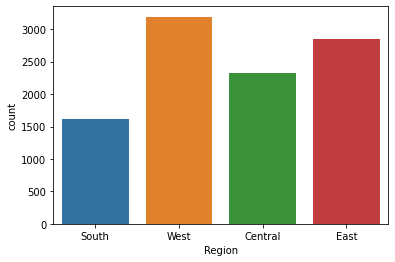

In [24]:
sns.countplot(x=data['Region'])

In [25]:
Top_region = data.groupby('Region').sum().sort_values('Sales', ascending=False)
Top_region

,Postal Code,Sales,Quantity,Discount,Profit
Region,,,,,
West,292783499,725255.6365,12234,350.00,108329.8079
East,50099338,678435.1960,10609,413.50,91506.3092
Central,151523188,500782.8528,8768,557.14,39655.8752
South,55875052,391721.9050,6209,238.55,46749.4303


##### Observation: 
    1. West region generated the highest revenue of above $108329
    2. The second highest revenue region is East
    3. the least revenue generated region is Central but the Discount given was highest to this region
    4. The least Quantity of sales and Discount given region is South.
    

##### West Region have more number of sale count

<AxesSubplot:xlabel='Segment', ylabel='count'>

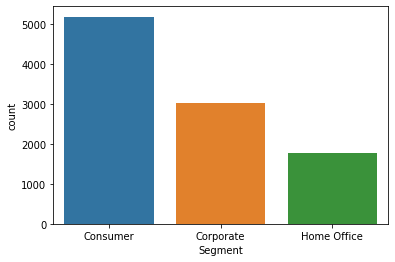

In [26]:
sns.countplot(x=data['Segment'])

##### Segment - consumer have more number of sale count

In [27]:
top_segment=data.groupby('Segment').sum().sort_values('Profit', ascending=False)
top_segment

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288269634,1.160833e+06,19497,820.51,134007.4413
Corporate,164108306,7.060701e+05,11591,476.85,91954.9798
Home Office,97903137,4.292927e+05,6732,261.83,60279.0015


##### Observation: 
    1. consumers generated more revenue compare to other segments
    2. the home office segment generated least revenue 

<AxesSubplot:xlabel='Category', ylabel='count'>

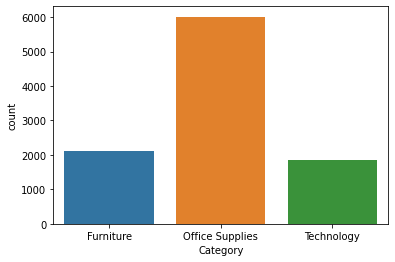

In [29]:
sns.countplot(x=data['Category'])

##### Category - Office supplies have more number of sales

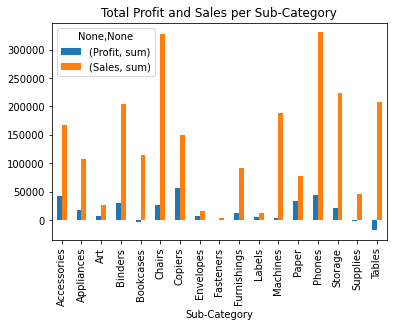

In [30]:
data.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
plt.show()

##### Observation:
    1. Highest profit is earned in Copiers while Selling price for Chairs and Phones is extremely high compared to other products.

    2. Another interesting fact-people dont prefer to buy Tables and Bookcases from Superstore. Hence these departments are in loss.

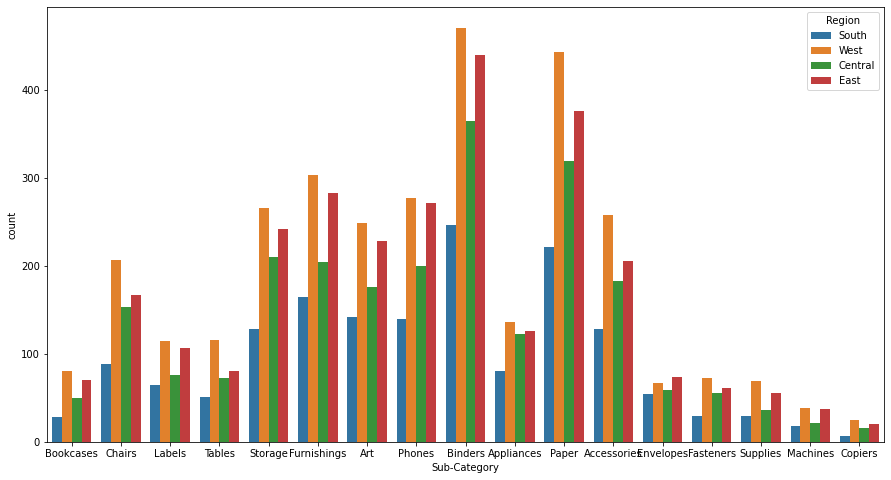

In [31]:
#Count of Sub-Category region wise
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

##### Observation:
    1. People residing in Western part of US tend to order more from superstore.
    2. People from south are buying very least compare to other region.
    3. Binders and papers are most prefered product from all the regions.

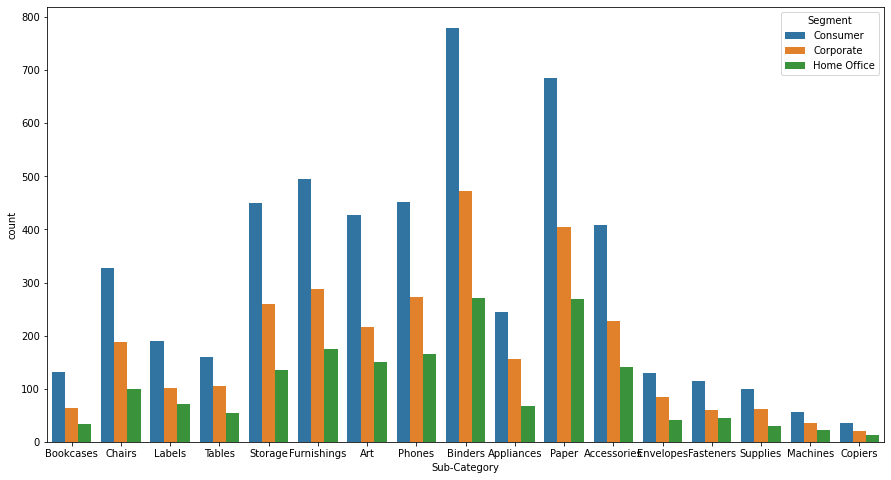

In [75]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Segment", data=data)
plt.show()

<AxesSubplot:xlabel='Sub-Category', ylabel='Profit'>

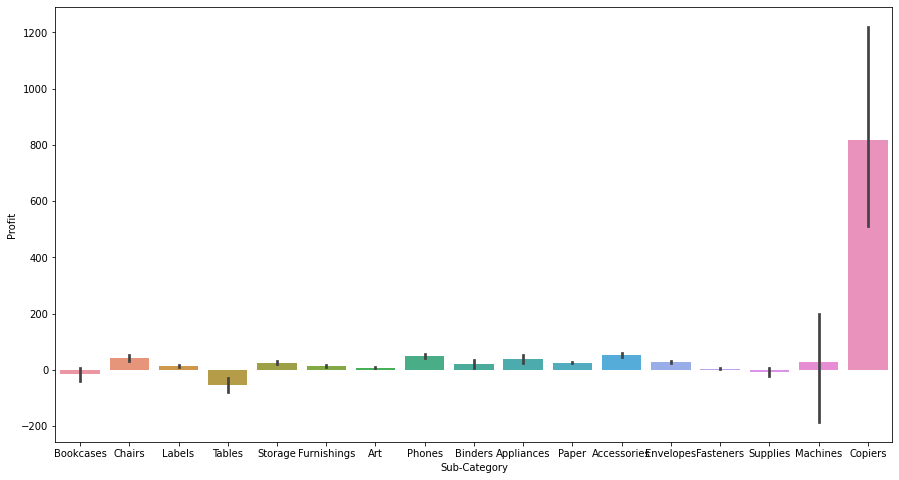

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])

##### Observation:
1. Copiers contributing the more profit 
2. People not prefered to buy tables and bookcases from this sample superstore. its in loss place compare to other sub-categories

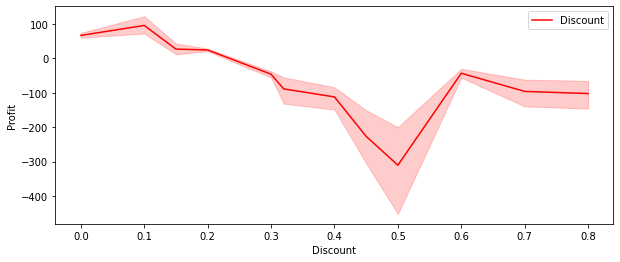

In [33]:
plt.figure(figsize = (10,4))
sns.lineplot('Discount', 'Profit', data = data, color = 'r', label= 'Discount')
plt.legend()

In [34]:
numeric_col=data[['Sales','Quantity','Discount','Profit']]

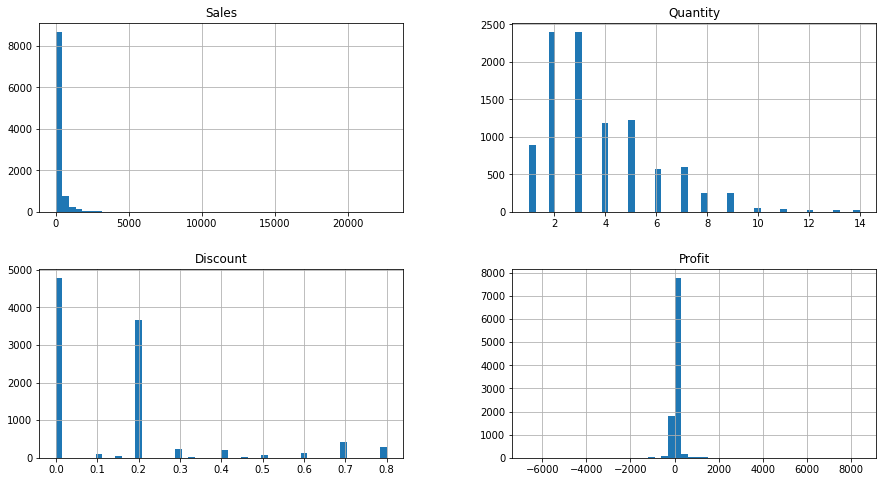

In [35]:
numeric_col.hist(bins=50 ,figsize=(15,8))
plt.show()

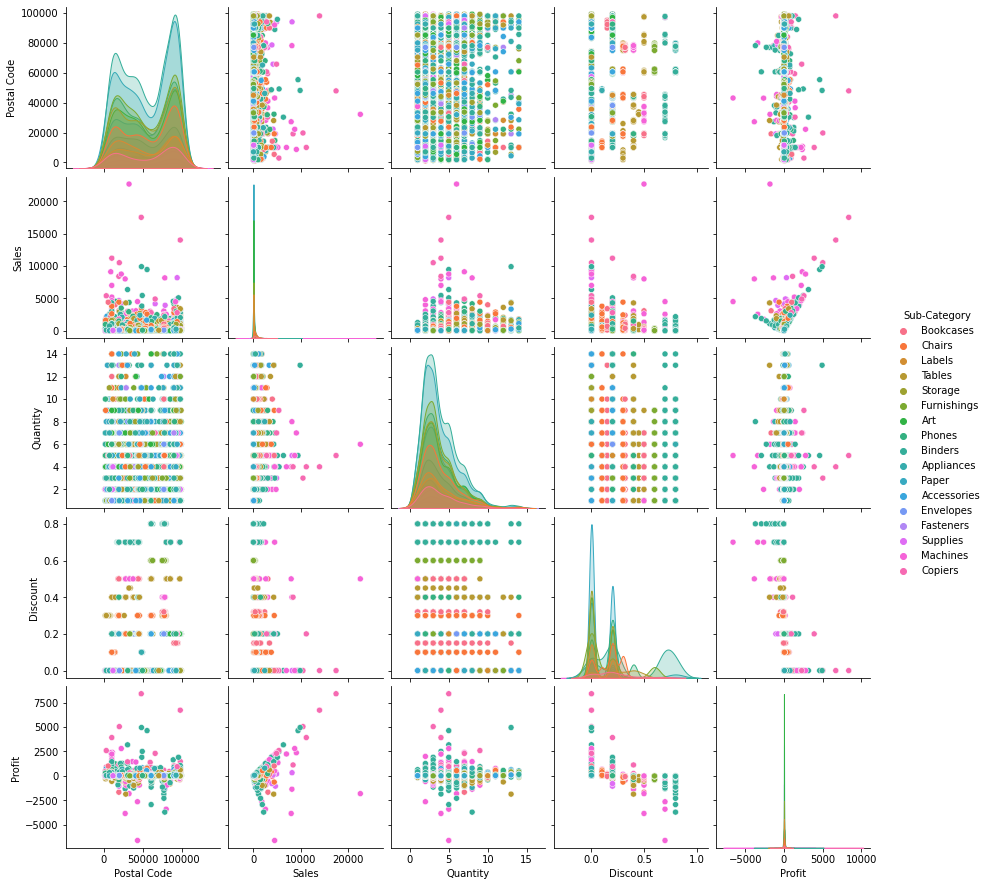

In [36]:
figsize=(15,10)
sns.pairplot(data,hue='Sub-Category')

In [37]:
state_code = {'Alabama': 'AL','Alaska': 'AK','Arizona': 'AZ','Arkansas': 'AR','California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','Florida': 'FL','Georgia': 'GA','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY','Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE','Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY','North Carolina': 'NC','North Dakota': 'ND','Ohio': 'OH','Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virginia': 'VA','District of Columbia': 'WA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}
data['state_code'] = data.State.apply(lambda x: state_code[x])

In [52]:
state_data = data[['Sales', 'Profit', 'state_code']].groupby(['state_code']).sum()


fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, 
    z = state_data.Sales, 
    locationmode = 'USA-states', 
    colorscale = 'Purples',
    colorbar_title = 'Sales in USD',
))

fig.update_layout(
    title_text = 'Total State-Wise Sales',
    geo_scope='usa',
    height=800,
)

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observation: 
1. The store has the highest sales in the state of California (shown in dark purple), selling around $457K of goods.

2. New York (bright purple, top right) is the state with the second highest sales, with more that $310k worth of goods sold.

3. The states of Texas (bottommost, blue) and Washington (top left, blue) end up third and fourth on the top sales 
charts with around $170K and 141K in sales respectively.

4. If we look at the overall data, we will observe that the supermarket company does most of its business in East 
Coast and West Coast region. In fact, the total sales in the state of New York is more than the sales in all of the 
Central America combined.

In [39]:
fig = go.Figure(data=go.Choropleth(
    locations=state_data.index, # Spatial coordinates
    z = state_data.Profit, 
    locationmode = 'USA-states', 
    colorscale = [[0, 'rgb(255,0,0)'], [0.25, 'rgb(255,255,255)'], [0.45, 'rgb(124,208,247)'], [0.6, 'rgb(97,255,140)'], [1, 'rgb(8,181,0)']],
    colorbar_title = 'Profits in USD',
))


fig.update_layout(
    title_text = 'Total State-Wise Profit/Loss',
    geo_scope='usa', # limite map scope to USA
    height=800,
)

fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observation:
    1.The states in shades of green, namely NewYork, California and Washington are the most profitable for the company, with profits of over 30K dollars. 

    2. The states in teal and blue, with an average profit of around 25K dollars are mostly situated in the north-east and south-east region. 

    3.The state of Texas, with the third highest sales proved to be the most expensive state for the company with a very high loss of around $25K.

In [40]:
data['Cost'] = data['Sales'] - data['Profit']
data['Profit%'] = data['Profit']/data['Cost']*100
data[['Sub-Category','Profit%']].sort_values('Profit%',ascending=False).head().fillna(0).style\
        .background_gradient(cmap='Greens',subset=['Profit%'])

,Sub-Category,Profit%
3363,Binders,100.000000
9062,Fasteners,100.000000
1452,Binders,100.000000
7966,Paper,100.000000
7280,Binders,100.000000


##### Envelopes, paper & Binders are the most profitable product in the store

In [41]:
d = []
for i in data['Sub-Category'].unique():
    sales = round(data[data['Sub-Category']==i]['Sales'].sum(),2)
    profit = round(data[data['Sub-Category']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
temp = pd.DataFrame(d,columns=['Sub-Category','Sales','Profit'])
temp = temp.sort_values('Sales',ascending=True)

fig = go.Figure(data=[go.Bar(name='Sales',x=temp['Sales'],y=temp['Sub-Category'],orientation='h',marker_color = 'green'),
                      go.Bar(name='Profit',x=temp['Profit'],y=temp['Sub-Category'],orientation='h',marker_color = 'navy')])
fig.update_layout(template='simple_white',title='Sales & Profit of each Sub-Category',height=700) #barmode='stack'
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Observation:
1. Supplies, Bookcases, tables are contributing more loss for the store. These product's losses will affect the over all profit of store
2. Sale of the Fasteners, labels, art are less compare to other products

In [42]:
d = []
for i in data['Ship Mode'].unique():
    sales = round(data[data['Ship Mode']==i]['Sales'].sum(),2)
    profit = round(data[data['Ship Mode']==i]['Profit'].sum(),2)
    d.append([i,sales,profit])
temp = pd.DataFrame(d,columns=['Ship Mode','Sales','Profit'])
temp = temp.sort_values('Sales',ascending=True)

fig = go.Figure(data=[go.Bar(name='Sales',x=temp['Sales'],y=temp['Ship Mode'],orientation='h',marker_color = 'green'),
                      go.Bar(name='Profit',x=temp['Profit'],y=temp['Ship Mode'],orientation='h',marker_color = 'navy')])
fig.update_layout(template='simple_white',title='Sales & Profit of each Ship Mode',height=700) #barmode='stack'
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Profit city wise report

In [43]:
data[['City','Profit','Profit%']].sort_values('Profit',ascending=False).head(10).style\
    .background_gradient(cmap='Greens',subset=['Profit'])\
    .background_gradient(cmap='RdPu',subset=['Profit%'])

,City,Profit,Profit%
6826,Lafayette,8399.976000,92.307692
8153,Seattle,6719.980800,92.307692
4190,Newark,5039.985600,92.307692
9039,Detroit,4946.370000,100.000000
4098,Minneapolis,4630.475500,96.078431
2623,New York City,3919.988800,53.846154
509,Atlanta,3177.475000,100.000000
8488,Arlington,2799.984000,47.058824
7666,Providence,2591.956800,92.307692
6520,Jackson,2504.221600,85.185185


### Loss Citywise Report

In [44]:
data[['City','Profit','Profit%']].sort_values('Profit',ascending=True).head(15).style\
    .background_gradient(cmap='Oranges',subset=['Profit'])\
    .background_gradient(cmap='RdPu',subset=['Profit%'])

,City,Profit,Profit%
7772,Lancaster,-6599.978000,-59.459459
683,Burlington,-3839.990400,-32.432432
9774,San Antonio,-3701.892800,-62.962963
3011,Louisville,-3399.980000,-57.142857
4991,Chicago,-2929.484500,-60.784314
3151,Newark,-2639.991200,-59.459459
5310,Houston,-2287.782000,-60.000000
9639,Concord,-1862.312400,-30.232558
1199,Houston,-1850.946400,-62.962963
2697,Jacksonville,-1811.078400,-7.407407


### Profit State wise Report

In [45]:
data[['State','Profit','Profit%']].sort_values('Profit',ascending=False).head(10).style\
    .background_gradient(cmap='Greens',subset=['Profit'])\
    .background_gradient(cmap="RdPu",subset=['Profit%'])

,State,Profit,Profit%
6826,Indiana,8399.976000,92.307692
8153,Washington,6719.980800,92.307692
4190,Delaware,5039.985600,92.307692
9039,Michigan,4946.370000,100.000000
4098,Minnesota,4630.475500,96.078431
2623,New York,3919.988800,53.846154
509,Georgia,3177.475000,100.000000
8488,Virginia,2799.984000,47.058824
7666,Rhode Island,2591.956800,92.307692
6520,Michigan,2504.221600,85.185185


### Loss Statewise Report

In [46]:
data[['State','Profit','Profit%']].sort_values('Profit',ascending=True).head(15).style\
    .background_gradient(cmap='Oranges',subset=['Profit'])\
    .background_gradient(cmap="RdPu",subset=['Profit%'])

,State,Profit,Profit%
7772,Ohio,-6599.978000,-59.459459
683,North Carolina,-3839.990400,-32.432432
9774,Texas,-3701.892800,-62.962963
3011,Colorado,-3399.980000,-57.142857
4991,Illinois,-2929.484500,-60.784314
3151,Ohio,-2639.991200,-59.459459
5310,Texas,-2287.782000,-60.000000
9639,North Carolina,-1862.312400,-30.232558
1199,Texas,-1850.946400,-62.962963
2697,Florida,-1811.078400,-7.407407


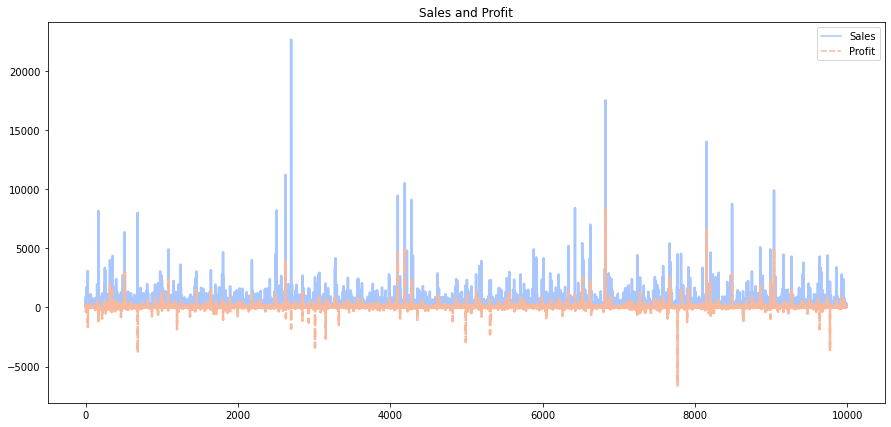

In [70]:
plt.figure(figsize=(15,7))
sns.lineplot(data=data[['Sales','Profit']], palette = "coolwarm", linewidth=2.5)
plt.title("Sales and Profit")
plt.show()

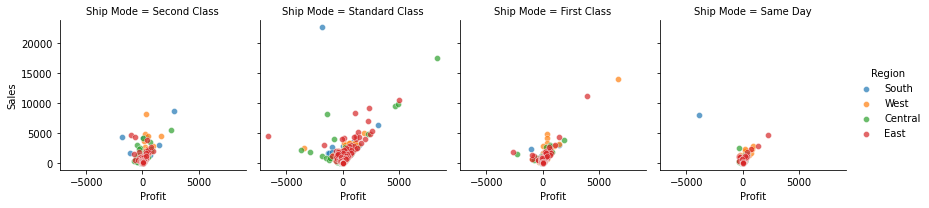

In [47]:
g = sns.FacetGrid(data, col="Ship Mode", hue="Region")
g.map(sns.scatterplot, "Profit", "Sales", alpha=.7)
g.add_legend()

Ship mode of same day having the least profit and standard class of ship mode having highest profit 

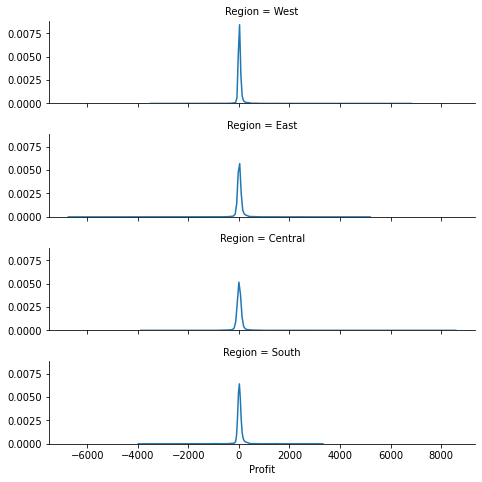

In [48]:
Region_wise = data.Region.value_counts().index
g = sns.FacetGrid(data, row="Region", row_order=Region_wise,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "Profit")

West Region having the highest profit compare to other regions
south and central having the least profit reions

In [49]:
data['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

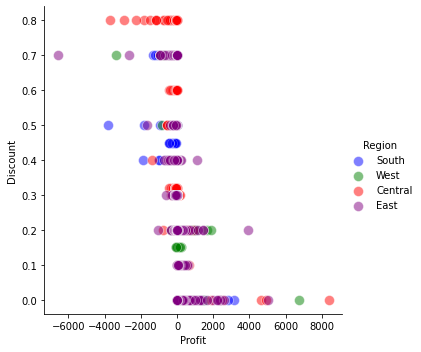

In [50]:
pal = dict(West="green", East="purple", Central='red', South='blue')
g = sns.FacetGrid(data, hue="Region", palette=pal, height=5)
g.map(sns.scatterplot, "Profit", "Discount", s=100, alpha=.5)
g.add_legend()

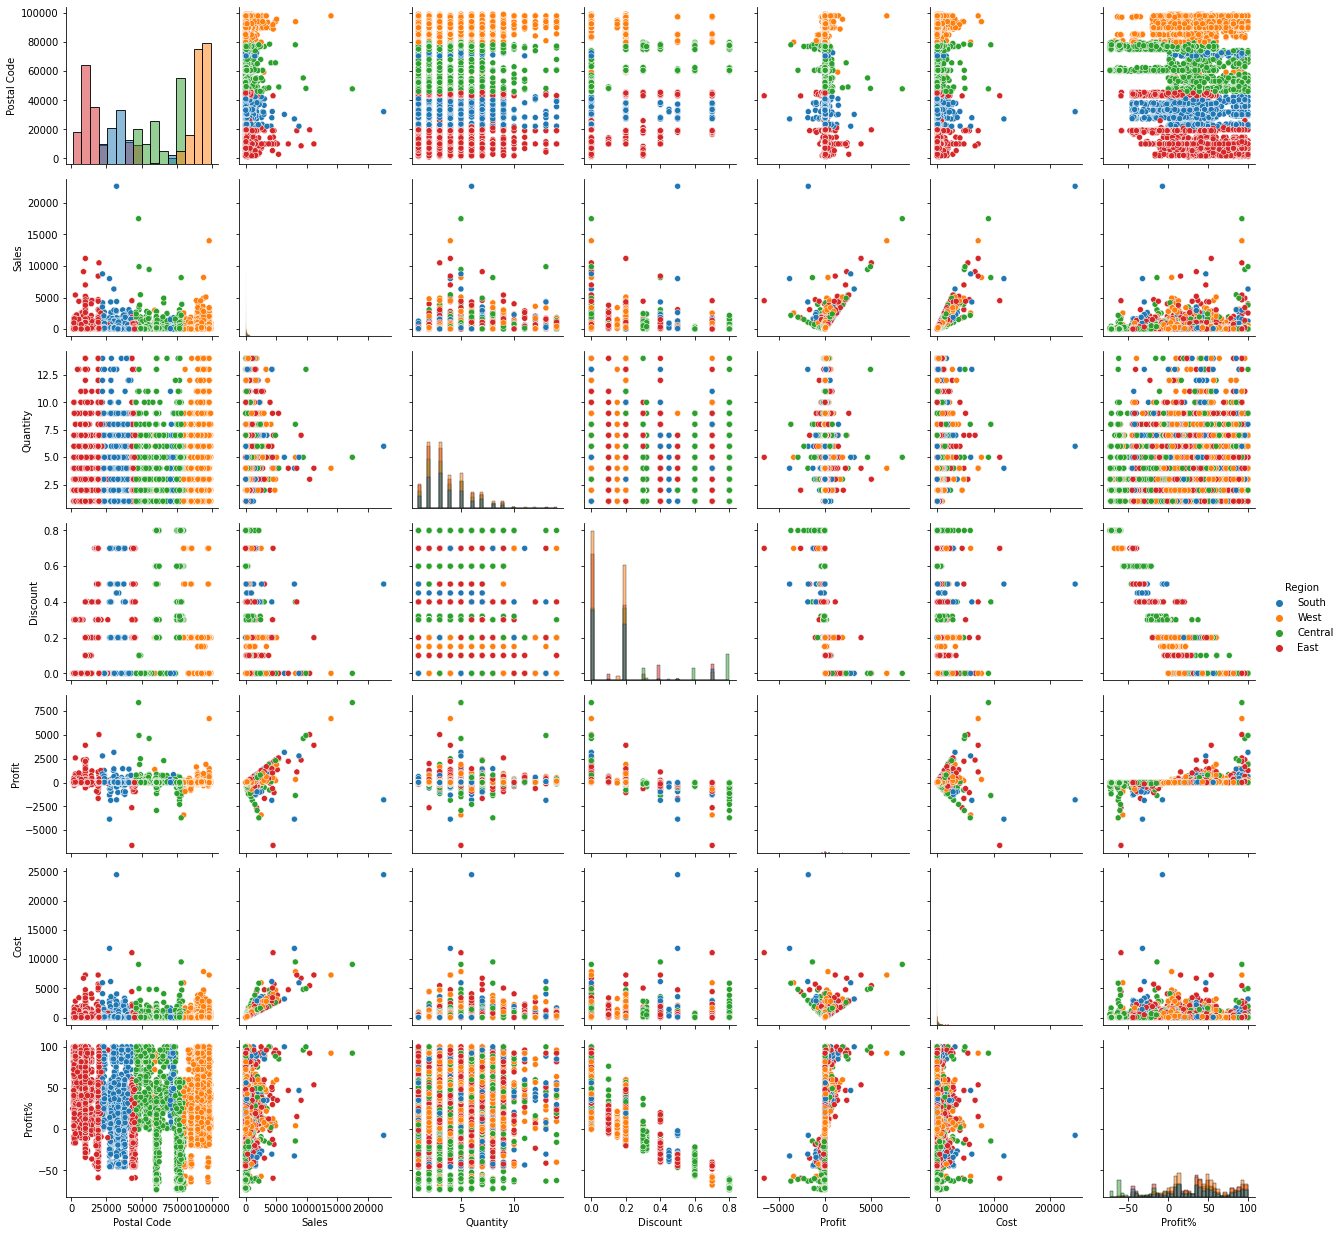

In [51]:
g = sns.PairGrid(data, hue="Region")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()